## Declaraciones


In [126]:
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import seaborn as sns
from matplotlib import pyplot as plt
from statistics import mean, mode
from datetime import datetime
from copy import deepcopy


class KNNClassifier:
    def __init__(self, k=5):
        self.k = k
        self.models = {
            "Algoritmos Bioinspirados": KNeighborsRegressor(n_neighbors=self.k),
            "Procesamiento de Señales": KNeighborsRegressor(n_neighbors=self.k),
            "Teoría de la Computación": KNeighborsRegressor(n_neighbors=self.k),
            "Tecnologías del Lenguaje Natural": KNeighborsRegressor(n_neighbors=self.k),
            "Aprendizaje de Máquina": KNeighborsRegressor(n_neighbors=self.k),
            "Visión Artificial": KNeighborsRegressor(n_neighbors=self.k),
        }

        self.scaler = StandardScaler()

    def preprocess(self, X, y):
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42
        )
        X_train, X_test = self.scale(X_train, X_test)
        return X_train, X_test, y_train, y_test

    def scale(self, X_train, X_test):
        # Assuming df is a DataFrame with numerical features

        X_train = pd.DataFrame(
            self.scaler.fit_transform(X_train), columns=X_train.columns
        )
        X_test = pd.DataFrame(self.scaler.fit_transform(X_test), columns=X_test.columns)
        return X_train, X_test

    def fit(self, model, X, y):

        self.models[model].fit(X, y)

    def predict(self, model, X):
        return self.models[model].predict(X)

In [127]:
df = pd.read_excel("Respuestas.xlsx")
df

,ID,Hora de inicio,Hora de finalización,Correo electrónico,Nombre,Hora de la última modificación,Indica tu género,Indica tu edad,¿Cuánto tiempo te toma el trayecto de ida y vuelta entre tu casa y la universidad?,¿Tienes otras responsabilidades además de estudiar y/o trabajar?,¿Cuál es tu carga académica? (Cantidad de materias),¿Actualmente trabajas?,¿Estudias en ambos turnos (matutino y vespertino) o solo en uno?\n,Lunes,Martes,Miércoles,Jueves,Viernes,¿Tienes un horario definido para estudiar?,¿Cuánto tiempo al día dedicas a estudiar fuera del horario escolar?,"¿Consideras que cuentas con una organización de tiempos para el estudio adecuada? (Por ejemplo, dividir tus temas por asignatura y dificultad de acuerdo al tiempo con el que cuentas).",¿Cómo calificarías tu nivel de organización académica?,¿Consideras que gestionas bien tu tiempo de estudio?,¿Qué tan frecuentemente postergas actividades académicas?,¿Sueles cumplir con los tiempos de entrega de tus tareas?,Ordena las materias de 5to Semestre por dificultad y dedicación que necesites,¿Qué problema principalmente enfrentas al momento de planificar tus tiempos de estudio?,¿Qué herramientas usas para organizarte?,¿Qué funcionalidades consideras más útiles para una agenda de estudio con IA?\n,¿Qué esperas al utilizar una aplicación para brindarte apoyo en tu organización académica?
0,1,2025-05-14 09:34:58,2025-05-14 09:37:16,anonymous,NaN,NaN,Masculino,21-23,30 – 60 min,"Sí, tengo otras actividades (deporte, voluntar...",Media (5-6 materias),No trabajo actualmente,Solo en turno matutino,16:00-19:00,16:00-19:00,16:00-19:00,16:00-19:00,16:00-19:00,No,1hr - 2hrs,No :(,Medio,A veces,Ocasionalmente,Siempre,Procesamiento de Señales;Teoría de la Computac...,Me distraigo fácilmente,"No uso ninguna, con mi memoria me basta 🥱;",Seguimiento de tareas y entregas;,Aprovechar mi tiempo de buena manera
1,2,2025-05-14 09:38:41,2025-05-14 09:42:08,anonymous,NaN,NaN,Masculino,21-23,30 – 60 min,"Sí, tengo otras actividades (deporte, voluntar...",Media (5-6 materias),"Sí, a medio tiempo",Solo en turno vespertino,7:00–10:00,7:00–10:00,7:00–10:00,7:00–10:00,7:00–10:00,Si,1hr - 2hrs,Si :),Medio,Si,Ocasionalmente,A veces,Teoría de la Computación;Procesamiento de Seña...,Me cuesta priorizar las actividades y tareas,Notion / Trello;,Seguimiento de tareas y entregas;Ajustes dinám...,Aprovechar mi tiempo de buena manera
2,3,2025-05-14 09:40:23,2025-05-14 09:43:29,anonymous,NaN,NaN,Masculino,21-23,30 – 60 min,"No, solo estudio o trabajo",Media (5-6 materias),No trabajo actualmente,Estudio en ambos turnos,13:00–16:00,10:00–13:00,13:00–16:00,13:00–16:00,10:00–13:00,No,30 min - 1 hora,No :(,Medio,No,Frecuentemente,Siempre,Procesamiento de Señales;Algoritmos Bioinspira...,Me distraigo fácilmente,Microsoft To Do;,Seguimiento de tareas y entregas;Recordatorios...,Aprovechar mi tiempo de buena manera
3,4,2025-05-14 09:44:29,2025-05-14 09:51:39,anonymous,NaN,NaN,Masculino,21-23,30 – 60 min,"Sí, cuido a alguien (hijos, hermanos, adultos ...",Media (5-6 materias),No trabajo actualmente,Estudio en ambos turnos,16:00-19:00,16:00-19:00,16:00-19:00,16:00-19:00,16:00-19:00,Si,2hrs o más,No :(,Medio,A veces,Frecuentemente,A veces,Procesamiento de Señales;Teoría de la Computac...,Me distraigo fácilmente,"Notion / Trello;No uso ninguna, con mi memoria...",Recomendaciones automáticas de estudio según d...,Tener mis tareas mejor ordenadas
4,5,2025-05-14 09:58:19,2025-05-14 09:59:14,anonymous,NaN,NaN,Masculino,21-23,De 1 a 2 horas,"Sí, tengo otras actividades (deporte, voluntar...",Media (5-6 materias),No trabajo actualmente,Estudio en ambos turnos,19:00-22:00,19:00-22:00,19:00-22:00,19:00-22:00,19:00-22:00,No,1hr - 2hrs,No :(,Alto,Si,Siempre,Siempre,Procesamiento de Señales;Teoría de la Computac...,Me distraigo fácilmente,"No uso ninguna, con mi memoria me basta 🥱;Agen...",Recomendaciones automáticas de estudio según d...,Aprovechar mi tiempo de buena manera
5,6,2025-05-14 10:02:09,2025-05-14 10:05:05,anonymous,NaN,NaN,Mas

### Frecuencias


In [128]:
def materias_frecuencias(x):
    l = {
        "Algoritmos Bioinspirados": 0,
        "Procesamiento de Señales": 0,
        "Teoría de la Computación": 0,
        "Tecnologías del Lenguaje Natural": 0,
        "Aprendizaje de Máquina": 0,
        "Visión Artificial": 0,
    }
    for i in range(len(x)):
        lst = x[i].split(";")
        for key in l.keys():
            for j in range(len(lst)):
                if key == lst[j]:
                    l[key] += (6 - j) ** 0.8
    return l

In [129]:
def frecuencia_individual(x, i, frecuencias, l):
    lst = x[i].split(";")
    for key in frecuencias.keys():
        for j in range(len(lst)):
            if key == lst[j]:
                l[key] = (6 - j) ** 0.8 * frecuencias[key]
    suma = sum(list(l.values()))
    for key in frecuencias.keys():
        l[key] = l[key] / suma
    return l

In [130]:
def calc_horas(hora):
    horas = hora.split("–")
    if len(horas) != 2:
        horas = hora.split("-")
    hora1 = horas[0].split(":")
    hora2 = horas[1].split(":")
    return (int(hora1[0]) + int(hora2[0])) / 2

In [131]:
def tiempo_al_dia(hora):
    if hora == "Menos de 30 min o simplemente no estudio":
        return 0.25
    elif hora == "30 min - 1 hora":
        return 0.75
    elif hora == "1hr - 2hrs":
        return 1.5
    else:
        return 2.5

In [132]:
def nuevo_df(df, frecuencias):
    n_df = pd.DataFrame(
        {
            "Algoritmos Bioinspirados": [],
            "Procesamiento de Señales": [],
            "Teoría de la Computación": [],
            "Tecnologías del Lenguaje Natural": [],
            "Aprendizaje de Máquina": [],
            "Visión Artificial": [],
            "Lunes": [],
            "Martes": [],
            "Miércoles": [],
            "Jueves": [],
            "Viernes": [],
            "Tiempo al día": [],
        }
    )
    for i in range(len(df)):
        l = {
            "Algoritmos Bioinspirados": 0,
            "Procesamiento de Señales": 0,
            "Teoría de la Computación": 0,
            "Tecnologías del Lenguaje Natural": 0,
            "Aprendizaje de Máquina": 0,
            "Visión Artificial": 0,
        }
        l = frecuencia_individual(
            df[
                "Ordena las materias de 5to Semestre por dificultad y dedicación que necesites"
            ].values,
            i,
            frecuencias,
            l,
        )
        registro = list(l.values())
        registro = registro + [
            calc_horas(df["Lunes"].values[i]),
            calc_horas(df["Martes"].values[i]),
            calc_horas(df["Miércoles"].values[i]),
            calc_horas(df["Jueves"].values[i]),
            calc_horas(df["Viernes"].values[i]),
            tiempo_al_dia(
                df[
                    "¿Cuánto tiempo al día dedicas a estudiar fuera del horario escolar?"
                ].values[i]
            ),
        ]

        n_df.loc[i] = registro

    return n_df

In [133]:
frecuencias = materias_frecuencias(
    df[
        "Ordena las materias de 5to Semestre por dificultad y dedicación que necesites"
    ].values
)
frecuencias

{'Algoritmos Bioinspirados': 158.30509038677886,
 'Procesamiento de Señales': 181.63542828405102,
 'Teoría de la Computación': 187.44200393779812,
 'Tecnologías del Lenguaje Natural': 120.82861667752901,
 'Aprendizaje de Máquina': 139.0160528150361,
 'Visión Artificial': 124.63714652577322}

In [134]:
suma = sum(list(frecuencias.values()))
suma

911.8643386269663

In [135]:
for key in frecuencias.keys():
    frecuencias[key] = frecuencias[key] / suma
frecuencias

{'Algoritmos Bioinspirados': 0.17360596711693507,
 'Procesamiento de Señales': 0.19919128382358647,
 'Teoría de la Computación': 0.2055590903138483,
 'Tecnologías del Lenguaje Natural': 0.13250722893656078,
 'Aprendizaje de Máquina': 0.15245256002045063,
 'Visión Artificial': 0.13668386978861877}

In [136]:
n_df = nuevo_df(df, frecuencias)
n_df

,Algoritmos Bioinspirados,Procesamiento de Señales,Teoría de la Computación,Tecnologías del Lenguaje Natural,Aprendizaje de Máquina,Visión Artificial,Lunes,Martes,Miércoles,Jueves,Viernes,Tiempo al día
0,0.148757,0.297172,0.265051,0.047147,0.094444,0.147429,17.5,17.5,17.5,17.5,17.5,1.50
1,0.062986,0.261896,0.312708,0.115776,0.096303,0.150331,8.5,8.5,8.5,8.5,8.5,1.50
2,0.233953,0.310585,0.076441,0.118666,0.171859,0.088497,14.5,11.5,14.5,14.5,11.5,0.75
3,0.062607,0.301194,0.268638,0.115078,0.166662,0.085821,17.5,17.5,17.5,17.5,17.5,2.50
4,0.185247,0.293988,0.262211,0.081209,0.129232,0.048112,20.5,20.5,20.5,20.5,20.5,1.50
5,0.148757,0.297172,0.265051,0.047147,0.094444,0.147429,20.5,20.5,20.5,20.5,20.5,0.25
6,0.191360,0.174424,0.313398,0.174604,0.096515,0.049700,8.5,8.5,8.5,8.5,8.5,0.75
7,0.065447,0.314857,0.134922,0.120298,0.208273,0.156202,8.5,8.5,8.5,8.5,8.5,0.75
8,0.148757,0.297172,0.265051,0.047147,0.094444,0.147429,8.5,8.5,8.5,8.5,8.5,1.50
9,0.149544,0.298743,0.266452,0.082522,0.054531,0.148208,20.5,20.5,20.5,20.5,20.5,0.75


In [137]:
n_df["Semana_l"] = n_df.apply(
    lambda x: mode(
        [
            x["Lunes"],
            x["Martes"],
            x["Miércoles"],
            x["Jueves"],
            x["Viernes"],
        ]
    ),
    axis=1,
)
n_df

,Algoritmos Bioinspirados,Procesamiento de Señales,Teoría de la Computación,Tecnologías del Lenguaje Natural,Aprendizaje de Máquina,Visión Artificial,Lunes,Martes,Miércoles,Jueves,Viernes,Tiempo al día,Semana_l
0,0.148757,0.297172,0.265051,0.047147,0.094444,0.147429,17.5,17.5,17.5,17.5,17.5,1.50,17.5
1,0.062986,0.261896,0.312708,0.115776,0.096303,0.150331,8.5,8.5,8.5,8.5,8.5,1.50,8.5
2,0.233953,0.310585,0.076441,0.118666,0.171859,0.088497,14.5,11.5,14.5,14.5,11.5,0.75,14.5
3,0.062607,0.301194,0.268638,0.115078,0.166662,0.085821,17.5,17.5,17.5,17.5,17.5,2.50,17.5
4,0.185247,0.293988,0.262211,0.081209,0.129232,0.048112,20.5,20.5,20.5,20.5,20.5,1.50,20.5
5,0.148757,0.297172,0.265051,0.047147,0.094444,0.147429,20.5,20.5,20.5,20.5,20.5,0.25,20.5
6,0.191360,0.174424,0.313398,0.174604,0.096515,0.049700,8.5,8.5,8.5,8.5,8.5,0.75,8.5
7,0.065447,0.314857,0.134922,0.120298,0.208273,0.156202,8.5,8.5,8.5,8.5,8.5,0.75,8.5
8,0.148757,0.297172,0.265051,0.047147,0.094444,0.147429,8.5,8.5,8.5,8.5,8.5,1.50,8.5
9,0.149544,0.298743,0.266452,0.082522,0.054531,0.148208,20.5,20.5,20.5,20.5,20.5,0.75,20.5


## Clasificador


In [138]:
X = n_df.drop(columns=["Semana_l"])
y = n_df["Semana_l"].apply(lambda x: str(x))

In [139]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
)

In [140]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [141]:
from sklearn.metrics import confusion_matrix

In [142]:
preds = classifier.predict(X_test)
confusion_matrix(y_test, preds)

array([[2, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 7, 0],
       [1, 0, 0, 1]])

In [143]:
n_df["Semana"] = classifier.predict(X)

In [144]:
n_df["Semana"] = n_df["Semana"].astype(float)
n_df.drop(columns=["Semana_l"], inplace=True)

In [145]:
n_df

,Algoritmos Bioinspirados,Procesamiento de Señales,Teoría de la Computación,Tecnologías del Lenguaje Natural,Aprendizaje de Máquina,Visión Artificial,Lunes,Martes,Miércoles,Jueves,Viernes,Tiempo al día,Semana
0,0.148757,0.297172,0.265051,0.047147,0.094444,0.147429,17.5,17.5,17.5,17.5,17.5,1.50,17.5
1,0.062986,0.261896,0.312708,0.115776,0.096303,0.150331,8.5,8.5,8.5,8.5,8.5,1.50,8.5
2,0.233953,0.310585,0.076441,0.118666,0.171859,0.088497,14.5,11.5,14.5,14.5,11.5,0.75,11.5
3,0.062607,0.301194,0.268638,0.115078,0.166662,0.085821,17.5,17.5,17.5,17.5,17.5,2.50,17.5
4,0.185247,0.293988,0.262211,0.081209,0.129232,0.048112,20.5,20.5,20.5,20.5,20.5,1.50,20.5
5,0.148757,0.297172,0.265051,0.047147,0.094444,0.147429,20.5,20.5,20.5,20.5,20.5,0.25,20.5
6,0.191360,0.174424,0.313398,0.174604,0.096515,0.049700,8.5,8.5,8.5,8.5,8.5,0.75,8.5
7,0.065447,0.314857,0.134922,0.120298,0.208273,0.156202,8.5,8.5,8.5,8.5,8.5,0.75,8.5
8,0.148757,0.297172,0.265051,0.047147,0.094444,0.147429,8.5,8.5,8.5,8.5,8.5,1.50,8.5
9,0.149544,0.298743,0.266452,0.082522,0.054531,0.148208,20.5,20.5,20.5,20.5,20.5,0.75,20.5


In [146]:
n_df.drop(columns=["Lunes", "Martes", "Miércoles", "Jueves", "Viernes"], inplace=True)
n_df

,Algoritmos Bioinspirados,Procesamiento de Señales,Teoría de la Computación,Tecnologías del Lenguaje Natural,Aprendizaje de Máquina,Visión Artificial,Tiempo al día,Semana
0,0.148757,0.297172,0.265051,0.047147,0.094444,0.147429,1.50,17.5
1,0.062986,0.261896,0.312708,0.115776,0.096303,0.150331,1.50,8.5
2,0.233953,0.310585,0.076441,0.118666,0.171859,0.088497,0.75,11.5
3,0.062607,0.301194,0.268638,0.115078,0.166662,0.085821,2.50,17.5
4,0.185247,0.293988,0.262211,0.081209,0.129232,0.048112,1.50,20.5
5,0.148757,0.297172,0.265051,0.047147,0.094444,0.147429,0.25,20.5
6,0.191360,0.174424,0.313398,0.174604,0.096515,0.049700,0.75,8.5
7,0.065447,0.314857,0.134922,0.120298,0.208273,0.156202,0.75,8.5
8,0.148757,0.297172,0.265051,0.047147,0.094444,0.147429,1.50,8.5
9,0.149544,0.298743,0.266452,0.082522,0.054531,0.148208,0.75,20.5


In [147]:
tiempo_efectivo = {
    "8.5": n_df[n_df["Semana"] == 8.5]["Tiempo al día"].mean(),
    "11.5": n_df[n_df["Semana"] == 11.5]["Tiempo al día"].mean(),
    "14.5": n_df[n_df["Semana"] == 14.5]["Tiempo al día"].mean(),
    "17.5": n_df[n_df["Semana"] == 17.5]["Tiempo al día"].mean(),
    "20.5": n_df[n_df["Semana"] == 20.5]["Tiempo al día"].mean(),
}

tiempo_efectivo

{'8.5': np.float64(1.0681818181818181),
 '11.5': np.float64(1.1875),
 '14.5': np.float64(1.45),
 '17.5': np.float64(1.2142857142857142),
 '20.5': np.float64(1.1153846153846154)}

In [148]:
for key in tiempo_efectivo.keys():
    tiempo_efectivo[key] = (tiempo_efectivo[key] / max(tiempo_efectivo.values())) * 0.9
tiempo_efectivo

{'8.5': np.float64(0.6630094043887147),
 '11.5': np.float64(0.7370689655172414),
 '14.5': np.float64(0.9),
 '17.5': np.float64(0.9),
 '20.5': np.float64(0.9)}

In [149]:
tiempo_efectivo

{'8.5': np.float64(0.6630094043887147),
 '11.5': np.float64(0.7370689655172414),
 '14.5': np.float64(0.9),
 '17.5': np.float64(0.9),
 '20.5': np.float64(0.9)}

In [150]:
def etiquetar(df, tiempo_efectivo):
    n_df = deepcopy(df)

    n_df["Et_Algoritmos Bioinspirados"] = df.apply(
        lambda row: tiempo_efectivo[str(row["Semana"])]
        * row["Algoritmos Bioinspirados"],
        axis=1,
    )

    n_df["Et_Procesamiento de Señales"] = df.apply(
        lambda row: tiempo_efectivo.get(str(row["Semana"]), 0)
        * row["Procesamiento de Señales"],
        axis=1,
    )

    n_df["Et_Teoría de la Computación"] = df.apply(
        lambda row: tiempo_efectivo.get(str(row["Semana"]), 0)
        * row["Teoría de la Computación"],
        axis=1,
    )

    n_df["Et_Tecnologías del Lenguaje Natural"] = df.apply(
        lambda row: tiempo_efectivo.get(str(row["Semana"]), 0)
        * row["Tecnologías del Lenguaje Natural"],
        axis=1,
    )

    n_df["Et_Aprendizaje de Máquina"] = df.apply(
        lambda row: tiempo_efectivo.get(str(row["Semana"]), 0)
        * row["Aprendizaje de Máquina"],
        axis=1,
    )

    n_df["Et_Visión Artificial"] = df.apply(
        lambda row: tiempo_efectivo.get(str(row["Semana"]), 0)
        * row["Visión Artificial"],
        axis=1,
    )

    return n_df

In [151]:
df_et = etiquetar(n_df, tiempo_efectivo)
df_et

,Algoritmos Bioinspirados,Procesamiento de Señales,Teoría de la Computación,Tecnologías del Lenguaje Natural,Aprendizaje de Máquina,Visión Artificial,Tiempo al día,Semana,Et_Algoritmos Bioinspirados,Et_Procesamiento de Señales,Et_Teoría de la Computación,Et_Tecnologías del Lenguaje Natural,Et_Aprendizaje de Máquina,Et_Visión Artificial
0,0.148757,0.297172,0.265051,0.047147,0.094444,0.147429,1.50,17.5,0.133882,0.267455,0.238546,0.042432,0.085000,0.132686
1,0.062986,0.261896,0.312708,0.115776,0.096303,0.150331,1.50,8.5,0.041761,0.173639,0.207329,0.076761,0.063850,0.099671
2,0.233953,0.310585,0.076441,0.118666,0.171859,0.088497,0.75,11.5,0.172440,0.228922,0.056342,0.087465,0.126672,0.065229
3,0.062607,0.301194,0.268638,0.115078,0.166662,0.085821,2.50,17.5,0.056346,0.271074,0.241774,0.103570,0.149996,0.077239
4,0.185247,0.293988,0.262211,0.081209,0.129232,0.048112,1.50,20.5,0.166722,0.264590,0.235990,0.073088,0.116309,0.043301
5,0.148757,0.297172,0.265051,0.047147,0.094444,0.147429,0.25,20.5,0.133882,0.267455,0.238546,0.042432,0.085000,0.132686
6,0.191360,0.174424,0.313398,0.174604,0.096515,0.049700,0.75,8.5,0.126873,0.115645,0.207786,0.115764,0.063991,0.032951
7,0.065447,0.314857,0.134922,0.120298,0.208273,0.156202,0.75,8.5,0.043392,0.208753,0.089455,0.079759,0.138087,0.103564
8,0.148757,0.297172,0.265051,0.047147,0.094444,0.147429,1.50,8.5,0.098627,0.197028,0.175731,0.031259,0.062617,0.097747
9,0.149544,0.298743,0.266452,0.082522,0.054531,0.148208,0.75,20.5,0.134589,0.268869,0.239807,0.074270,0.049078,0.133387


### Tareas


In [152]:
import json


def leer_json(ruta: str):
    with open(ruta, "r", encoding="utf-8") as archivo:
        datos = json.load(archivo)
    return datos

In [153]:
json = leer_json("pruebas.json")

In [154]:
def asignar_tareas(json: dict, tiempo_semanal: float, frecuencias: dict):
    from datetime import datetime, timedelta
    from statistics import mean

    tareas_actividad = {}

    # Mapeo de números de día a nombres en español
    dias_semana = {
        0: "lunes",
        1: "martes",
        2: "miércoles",
        3: "jueves",
        4: "viernes",
        5: "sábado",
        6: "domingo",
    }

    # Obtener fecha actual
    fecha_actual = datetime.now().date()

    # Diccionario auxiliar para tracking de materias (para aplicar frecuencias por materia)
    tareas_por_materia = {}
    for materia in json["tareas"].keys():
        tareas_por_materia[materia] = 0

    # Procesar cada tarea y crear el diccionario principal
    for materia in json["tareas"].keys():
        for tarea in json["tareas"][materia]:
            descripcion = tarea["descripcion"]
            tiempo_total = tarea["tiempoDuracion"] / 60

            # Procesar fecha de entrega
            fecha_entrega = datetime.strptime(tarea["fechaEntrega"], "%Y-%m-%d").date()

            # Calcular días faltantes
            dias_faltantes = (fecha_entrega - fecha_actual).days

            # Determinar día de la semana (solo si es <= 7 días)
            if dias_faltantes <= 7:
                dia_semana = dias_semana[fecha_entrega.weekday()]
                # Todo el tiempo va en tiempo_horas
                tiempo_horas = tiempo_total
                tiempo_horas_sig = None
            else:
                dia_semana = None
                # Algoritmo de distribución de tiempo según días faltantes
                # Los primeros 7 días reciben una proporción del trabajo total
                # Fórmula: entre 30% y 70% dependiendo de cuántos días falten
                factor_base = 7 / dias_faltantes  # Proporción básica
                factor_ajustado = 0.3 + (0.4 * factor_base)  # Entre 30% y 70%
                factor_ajustado = min(factor_ajustado, 0.7)  # Máximo 70%

                tiempo_horas = tiempo_total * factor_ajustado
                tiempo_horas_sig = tiempo_total - tiempo_horas

            # Crear entrada en el diccionario principal
            tareas_actividad[descripcion] = {
                "tiempo_horas": tiempo_horas,
                "tiempo_horas_sig": tiempo_horas_sig,
                "dia_semana": dia_semana,
                "fecha_entrega": tarea["fechaEntrega"],
                "dias_faltantes": dias_faltantes,
                "materia": materia,  # Guardamos la materia para aplicar frecuencias
                "tiempo_total_original": tiempo_total,  # Para aplicar frecuencias correctamente
            }

            # Actualizar contador por materia (con tiempo total original)
            tareas_por_materia[materia] += tiempo_total

    # Función auxiliar para recalcular distribución de tiempo
    def recalcular_distribucion_tiempo(tiempo_total_nuevo, dias_faltantes):
        """Recalcula la distribución entre tiempo_horas y tiempo_horas_sig"""
        if dias_faltantes <= 7:
            return tiempo_total_nuevo, None
        else:
            factor_base = 7 / dias_faltantes
            factor_ajustado = 0.3 + (0.4 * factor_base)
            factor_ajustado = min(factor_ajustado, 0.7)

            tiempo_horas = tiempo_total_nuevo * factor_ajustado
            tiempo_horas_sig = tiempo_total_nuevo - tiempo_horas
            return tiempo_horas, tiempo_horas_sig

    # Aplicar frecuencias
    tareas_procesadas = set()

    for key in frecuencias.keys():
        # Si es una actividad específica
        if key in tareas_actividad and key not in tareas_procesadas:
            tiempo_total_original = tareas_actividad[key]["tiempo_total_original"]
            tiempo_total_ajustado = (tiempo_total_original * frecuencias[key]) / mean(
                frecuencias.values()
            )

            # Recalcular distribución con el nuevo tiempo total
            dias_faltantes = tareas_actividad[key]["dias_faltantes"]
            nuevo_tiempo_horas, nuevo_tiempo_horas_sig = recalcular_distribucion_tiempo(
                tiempo_total_ajustado, dias_faltantes
            )

            # Actualizar tiempos en el diccionario principal
            tareas_actividad[key]["tiempo_horas"] = nuevo_tiempo_horas
            tareas_actividad[key]["tiempo_horas_sig"] = nuevo_tiempo_horas_sig
            tareas_actividad[key]["tiempo_total_original"] = tiempo_total_ajustado
            tareas_procesadas.add(key)

            # Actualizar también el tracking por materia
            materia = tareas_actividad[key]["materia"]
            tareas_por_materia[materia] -= tiempo_total_original
            tareas_por_materia[materia] += tiempo_total_ajustado

        # Si es una materia completa
        elif key in tareas_por_materia:
            factor_ajuste = frecuencias[key] / mean(frecuencias.values())

            # Actualizar todas las actividades de esta materia
            for descripcion, datos in tareas_actividad.items():
                if datos["materia"] == key and descripcion not in tareas_procesadas:
                    tiempo_total_original = datos["tiempo_total_original"]
                    tiempo_total_ajustado = tiempo_total_original * factor_ajuste

                    # Recalcular distribución con el nuevo tiempo total
                    dias_faltantes = datos["dias_faltantes"]
                    nuevo_tiempo_horas, nuevo_tiempo_horas_sig = (
                        recalcular_distribucion_tiempo(
                            tiempo_total_ajustado, dias_faltantes
                        )
                    )

                    # Actualizar tiempos
                    tareas_actividad[descripcion]["tiempo_horas"] = nuevo_tiempo_horas
                    tareas_actividad[descripcion][
                        "tiempo_horas_sig"
                    ] = nuevo_tiempo_horas_sig
                    tareas_actividad[descripcion][
                        "tiempo_total_original"
                    ] = tiempo_total_ajustado
                    tareas_procesadas.add(descripcion)

    # Calcular tiempo restante (solo sumando tiempo_horas, no tiempo_horas_sig)
    tiempo_total_primera_semana = sum(
        datos["tiempo_horas"] for datos in tareas_actividad.values()
    )
    tiempo_restante = tiempo_semanal - tiempo_total_primera_semana

    # Limpiar los campos auxiliares del output final
    for descripcion in tareas_actividad:
        del tareas_actividad[descripcion]["materia"]
        del tareas_actividad[descripcion]["tiempo_total_original"]

    # Crear resultado final
    resultado = {"tareas": tareas_actividad, "tiempo_restante": tiempo_restante}

    return resultado

In [155]:
def calc_dif_horas(inicio, fin):
    inicio_parts = inicio.split(":")
    fin_parts = fin.split(":")

    inicio_horas = int(inicio_parts[0]) + int(inicio_parts[1]) / 60
    fin_horas = int(fin_parts[0]) + int(fin_parts[1]) / 60

    diferencia = fin_horas - inicio_horas

    # Si la diferencia es negativa, significa que cruza medianoche (ej: 23:00 a 06:44)
    if diferencia < 0:
        diferencia += 24

    return diferencia

In [156]:
def obtener_tiempo_libre(json: dict, frecuencias: dict):
    tiempo_libre_total = {}
    periodos_libres = {}
    momento_mas_libre = {}

    # Momentos del día a evaluar (en formato decimal)
    momentos_evaluar = [8.5, 11.5, 14.5, 17.5, 20.5]

    def decimal_a_hora(decimal):
        """Convierte hora decimal a formato HH:MM"""
        horas = int(decimal)
        minutos = int((decimal - horas) * 60)
        return f"{horas:02d}:{minutos:02d}"

    def hora_a_decimal(hora_str):
        """Convierte formato HH:MM a decimal"""
        partes = hora_str.split(":")
        return int(partes[0]) + int(partes[1]) / 60

    def calcular_tiempo_libre_momento(periodos, momento_decimal):
        """Calcula cuánto tiempo libre hay alrededor de un momento específico"""
        tiempo_total = 0
        momento_str = decimal_a_hora(momento_decimal)

        for inicio, fin in periodos:
            inicio_decimal = hora_a_decimal(inicio)
            fin_decimal = hora_a_decimal(fin)

            # Si el momento está dentro del período libre
            if inicio_decimal <= momento_decimal <= fin_decimal:
                # Sumar todo el período
                tiempo_total += fin_decimal - inicio_decimal
            # Si el período está cerca del momento (dentro de 2 horas)
            elif (
                abs(inicio_decimal - momento_decimal) <= 2
                or abs(fin_decimal - momento_decimal) <= 2
            ):
                # Sumar una fracción basada en la cercanía
                distancia_inicio = abs(inicio_decimal - momento_decimal)
                distancia_fin = abs(fin_decimal - momento_decimal)
                distancia_min = min(distancia_inicio, distancia_fin)

                if distancia_min <= 2:
                    # Dar más peso a períodos más cercanos
                    peso = (2 - distancia_min) / 2
                    tiempo_total += (fin_decimal - inicio_decimal) * peso

        return tiempo_total

    for dia in json["extras"].keys():
        # Recopilar todos los períodos ocupados del día
        ocupados = []

        # Agregar actividades extras (excepto "Dormirse" que manejamos especial)
        for actividad in json["extras"][dia]:
            if actividad["actividad"] != "Dormirse":
                ocupados.append((actividad["inicio"], actividad["fin"]))

        # Agregar clases si existen para este día
        if dia in json["clases"]:
            for clase in json["clases"][dia]:
                ocupados.append((clase["horaInicio"], clase["horaFin"]))

        # Ordenar por hora de inicio
        ocupados.sort(key=lambda x: x[0])

        # Encontrar períodos libres entre actividades
        libres = []
        tiempo_total = 0

        if ocupados:
            # Empezar desde el fin del desayuno en lugar de la hora de despertar
            primer_inicio = ocupados[0][0]  # Hora del desayuno

            # Períodos libres entre actividades (empezando desde después del desayuno)
            for i in range(len(ocupados) - 1):
                fin_actual = ocupados[i][1]
                inicio_siguiente = ocupados[i + 1][0]

                if fin_actual != inicio_siguiente:
                    tiempo_libre = calc_dif_horas(fin_actual, inicio_siguiente)
                    if tiempo_libre > 0:
                        libres.append((fin_actual, inicio_siguiente))
                        tiempo_total += tiempo_libre

            # Período libre al final del día (antes de dormir)
            hora_dormir = None
            for actividad in json["extras"][dia]:
                if actividad["actividad"] == "Dormirse":
                    hora_dormir = actividad["inicio"]
                    break

            if hora_dormir and ocupados[-1][1] != hora_dormir:
                tiempo_libre = calc_dif_horas(ocupados[-1][1], hora_dormir)
                if tiempo_libre > 0:
                    libres.append((ocupados[-1][1], hora_dormir))
                    tiempo_total += tiempo_libre

        # Calcular el momento más libre del día
        tiempo_por_momento = {}
        for momento in momentos_evaluar:
            tiempo_por_momento[momento] = calcular_tiempo_libre_momento(libres, momento)

        # Encontrar el momento con más tiempo libre
        momento_optimo = max(tiempo_por_momento, key=tiempo_por_momento.get)

        tiempo_libre_total[dia] = tiempo_total
        periodos_libres[dia] = libres
        momento_mas_libre[dia] = momento_optimo

    mats = [
        "Algoritmos Bioinspirados",
        "Procesamiento de Señales",
        "Teoría de la Computación",
        "Tecnologías del Lenguaje Natural",
        "Aprendizaje de Máquina",
        "Visión Artificial",
    ]
    materias = {}
    for mat in mats:
        materias[mat] = json["materias"][mat]["prioridad"] ** 0.8 * frecuencias[mat]

    return {
        "tiempo_total_libre": tiempo_libre_total,
        "periodos_libres": periodos_libres,
        "momento_mas_libre": momento_mas_libre,
        "materias": materias,
    }

In [157]:
tiempo_libre_por_dia = obtener_tiempo_libre(json, frecuencias)
tiempo_libre_por_dia

{'tiempo_total_libre': {'Mar': 13.25,
  'Jue': 13.25,
  'Lun': 11.25,
  'Vie': 13.25,
  'Mié': 13.25},
 'periodos_libres': {'Mar': [('08:00', '08:45'),
   ('09:00', '14:00'),
   ('15:00', '16:00'),
   ('16:30', '23:00')],
  'Jue': [('08:00', '08:45'),
   ('09:00', '14:00'),
   ('15:00', '16:00'),
   ('16:30', '23:00')],
  'Lun': [('08:00', '08:45'),
   ('09:00', '10:00'),
   ('12:00', '14:00'),
   ('15:00', '16:00'),
   ('16:30', '23:00')],
  'Vie': [('08:00', '08:45'),
   ('09:00', '14:00'),
   ('15:00', '16:00'),
   ('16:30', '23:00')],
  'Mié': [('08:00', '08:45'),
   ('09:00', '14:00'),
   ('15:00', '16:00'),
   ('16:30', '23:00')]},
 'momento_mas_libre': {'Mar': 17.5,
  'Jue': 17.5,
  'Lun': 17.5,
  'Vie': 17.5,
  'Mié': 17.5},
 'materias': {'Algoritmos Bioinspirados': 0.5262748808083958,
  'Procesamiento de Señales': 0.19919128382358647,
  'Teoría de la Computación': 0.8619016009280008,
  'Tecnologías del Lenguaje Natural': 0.4801927241175197,
  'Aprendizaje de Máquina': 0.462149

In [158]:
tiempo_total = 0
for dia in tiempo_libre_por_dia["tiempo_total_libre"].keys():
    tiempo_total += tiempo_libre_por_dia["tiempo_total_libre"][dia]
tiempo_total

64.25

In [159]:
tareas = asignar_tareas(json, tiempo_total, frecuencias)
tareas

{'tareas': {'prueba home 24': {'tiempo_horas': 0.5,
   'tiempo_horas_sig': None,
   'dia_semana': 'miércoles',
   'fecha_entrega': '2025-06-11',
   'dias_faltantes': -1},
  'nueva Tarea desde Home': {'tiempo_horas': 1.8294307202454074,
   'tiempo_horas_sig': None,
   'dia_semana': 'sábado',
   'fecha_entrega': '2025-06-14',
   'dias_faltantes': 2},
  'Evento nuevo calendario': {'tiempo_horas': 0.7303680406864838,
   'tiempo_horas_sig': 0.464779662255035,
   'dia_semana': None,
   'fecha_entrega': '2025-06-21',
   'dias_faltantes': 9},
  'Nueva desde Home': {'tiempo_horas': 0.8680298355846754,
   'tiempo_horas_sig': None,
   'dia_semana': 'sábado',
   'fecha_entrega': '2025-06-14',
   'dias_faltantes': 2}},
 'tiempo_restante': 60.32217140348343}

### Pruebas Modelo


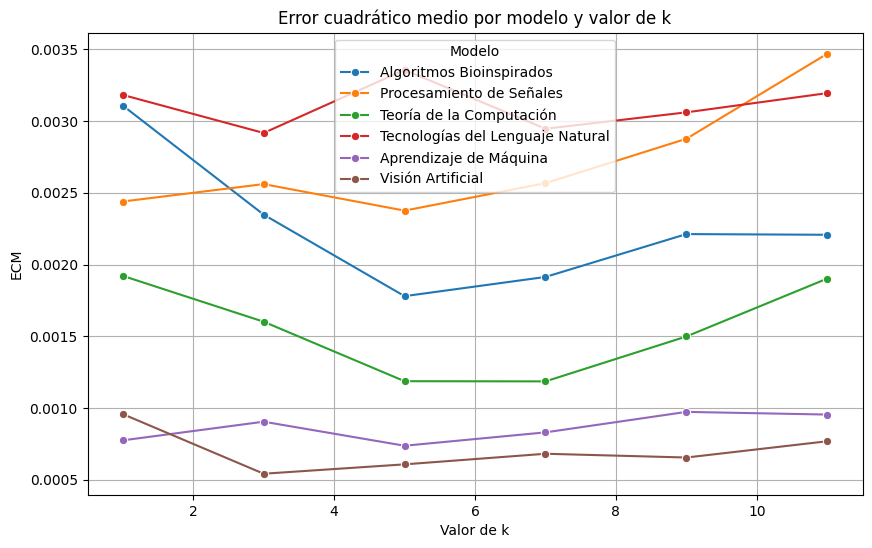

In [160]:
valores_k = [1, 3, 5, 7, 9, 11]
resultados = []
for k in valores_k:
    modelosKnn = KNNClassifier(k=k)
    X_train, X_test, y_train, y_test = modelosKnn.preprocess(n_df, df_et)
    for model in modelosKnn.models.keys():
        modelosKnn.fit(model, X_train, y_train["Et_" + model])
        pred = modelosKnn.predict(model, X_test)
        mse = mean_squared_error(y_test["Et_" + model], pred)
        resultados.append({"Modelo": model, "k": k, "ECM": mse})

df_resultados = pd.DataFrame(resultados)

# Mostramos la gráfica
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_resultados, x="k", y="ECM", hue="Modelo", marker="o")
plt.title("Error cuadrático medio por modelo y valor de k")
plt.xlabel("Valor de k")
plt.ylabel("ECM")
plt.grid(True)

In [161]:
modelosKnn = KNNClassifier(k=5)

X_train, X_test, y_train, y_test = modelosKnn.preprocess(n_df, df_et)
predicciones = {}
for model in modelosKnn.models.keys():
    modelosKnn.fit(model, X_train, y_train["Et_" + model])
    predicciones[model] = modelosKnn.predict(model, X_test)
    print(
        f"Error cuadrático medio para {model}:",
        mean_squared_error(y_test["Et_" + model], predicciones[model]),
    )

Error cuadrático medio para Algoritmos Bioinspirados: 0.0017796536338170407
Error cuadrático medio para Procesamiento de Señales: 0.0023755437031984347
Error cuadrático medio para Teoría de la Computación: 0.0011870779160249921
Error cuadrático medio para Tecnologías del Lenguaje Natural: 0.0033561009169924116
Error cuadrático medio para Aprendizaje de Máquina: 0.0007374230784709255
Error cuadrático medio para Visión Artificial: 0.000607649766064461


In [162]:
X_test.shape

(12, 8)

In [163]:
def predecir_individuo(tiempo: float, materias: dict, dias: dict):
    semana = mode(dias.values())
    predicciones = {}
    X = np.array(list(materias.values()) + [tiempo] + [semana])
    columnas = list(materias.keys()) + [
        "Tiempo al día",
        "Semana",
    ]
    X_df = pd.DataFrame([X], columns=columnas)
    X_df = pd.DataFrame(modelosKnn.scaler.transform(X_df), columns=X_df.columns)
    for model in modelosKnn.models.keys():

        predicciones[model] = modelosKnn.predict(model, X_df) * 5
    return predicciones

In [164]:
tareas["tiempo_restante"]

60.32217140348343

In [165]:
materias = predecir_individuo(
    tareas["tiempo_restante"] / 5,
    tiempo_libre_por_dia["materias"],
    tiempo_libre_por_dia["momento_mas_libre"],
)
materias, sum(materias.values())

({'Algoritmos Bioinspirados': array([0.94748307]),
  'Procesamiento de Señales': array([0.77850318]),
  'Teoría de la Computación': array([1.08703228]),
  'Tecnologías del Lenguaje Natural': array([0.48195093]),
  'Aprendizaje de Máquina': array([0.57335158]),
  'Visión Artificial': array([0.46874792])},
 array([4.33706897]))

In [166]:
pd.DataFrame(predicciones), y_test[
    [
        "Et_Algoritmos Bioinspirados",
        "Et_Procesamiento de Señales",
        "Et_Teoría de la Computación",
        "Et_Tecnologías del Lenguaje Natural",
        "Et_Aprendizaje de Máquina",
        "Et_Visión Artificial",
    ]
]

(    Algoritmos Bioinspirados  ...  Visión Artificial
 0                   0.154649  ...           0.121765
 1                   0.174106  ...           0.104867
 2                   0.187653  ...           0.097002
 3                   0.092193  ...           0.056799
 4                   0.076750  ...           0.082975
 5                   0.196711  ...           0.069953
 6                   0.103124  ...           0.078308
 7                   0.201925  ...           0.059013
 8                   0.175518  ...           0.037510
 9                   0.181532  ...           0.116623
 10                  0.176416  ...           0.066008
 11                  0.133454  ...           0.078567
 
 [12 rows x 6 columns],
     Et_Algoritmos Bioinspirados  ...  Et_Visión Artificial
 0                      0.133882  ...              0.132686
 5                      0.133882  ...              0.132686
 30                     0.206934  ...              0.136287
 13                     0.047471

### Funcion Final


In [167]:
import numpy as np
from datetime import datetime, timedelta


def asignar_horarios_estudio(
    horas_materias: dict,
    periodos_libres: dict,
    tareas_actividad: dict,
    tiempo_total_libre: dict,
    dia_actual: str,
    hora_actual: str,
    tiempo_sabado: float,
    tiempo_domingo: float,
):
    horarios_materias = {}
    horarios_tareas = {}

    # Mapeo de días
    dias_completos = {
        "lunes": "Lun",
        "martes": "Mar",
        "miércoles": "Mié",
        "jueves": "Jue",
        "viernes": "Vie",
        "sábado": "Sab",
        "domingo": "Dom",
    }

    dias_orden_original = ["Lun", "Mar", "Mié", "Jue", "Vie"]

    def hora_a_decimal(hora_str):
        partes = hora_str.split(":")
        return int(partes[0]) + int(partes[1]) / 60

    def decimal_a_hora(decimal):
        horas = int(decimal)
        minutos = int((decimal - horas) * 60)
        return f"{horas:02d}:{minutos:02d}"

    # PASO 1: Determinar el orden de días basado en el día actual
    dia_actual_abrev = dias_completos[dia_actual]
    hora_actual_decimal = hora_a_decimal(hora_actual)

    # Si es sábado o domingo, usar la lógica tradicional (lunes a viernes)
    if dia_actual_abrev in ["Sab", "Dom"]:
        dias_semana_orden = dias_orden_original.copy()
        ajustar_primer_dia = False
        incluir_proxima_semana = False
    else:
        # Reordenar días empezando desde hoy
        indice_actual = dias_orden_original.index(dia_actual_abrev)
        dias_semana_orden = (
            dias_orden_original[indice_actual:] + dias_orden_original[:indice_actual]
        )
        ajustar_primer_dia = True
        incluir_proxima_semana = True

    # PASO 2: Agregar días de la próxima semana si es necesario
    if incluir_proxima_semana:
        # Agregar todos los días de la próxima semana hasta el día actual (inclusive)
        indice_actual = dias_orden_original.index(dia_actual_abrev)
        dias_proxima_semana = dias_orden_original[
            : indice_actual + 1
        ]  # Incluir el día actual
        dias_proxima_semana_con_sufijo = [f"{dia}_p" for dia in dias_proxima_semana]
        dias_semana_orden.extend(dias_proxima_semana_con_sufijo)

    # FUNCIONALIDAD EXTRA: Eliminar duplicados (excepto el día actual)
    def eliminar_duplicados_excepto_actual(lista_dias, dia_actual_abrev):
        """Elimina días duplicados, priorizando los que terminan en '_p', excepto el día actual"""
        dias_finales = []
        dias_base_procesados = set()

        for dia in lista_dias:
            dia_base = dia[:-2] if dia.endswith("_p") else dia

            # Si es el día actual, siempre incluirlo (no eliminar duplicados)
            if dia_base == dia_actual_abrev:
                dias_finales.append(dia)
            elif dia_base not in dias_base_procesados:
                # Primera vez que vemos este día base (y no es el día actual)
                dias_finales.append(dia)
                dias_base_procesados.add(dia_base)
            elif dia.endswith("_p"):
                # Si ya existe el día base pero este termina en "_p", reemplazar
                for i, dia_existente in enumerate(dias_finales):
                    dia_existente_base = (
                        dia_existente[:-2]
                        if dia_existente.endswith("_p")
                        else dia_existente
                    )
                    if dia_existente_base == dia_base and not dia_existente.endswith(
                        "_p"
                    ):
                        dias_finales[i] = dia  # Reemplazar con la versión "_p"
                        break

        return dias_finales

    # Aplicar la eliminación de duplicados
    if incluir_proxima_semana:
        dias_semana_orden = eliminar_duplicados_excepto_actual(
            dias_semana_orden, dia_actual_abrev
        )

    # PASO 3: Ajustar períodos del primer día (día actual) según la hora actual
    def ajustar_periodos_primer_dia(periodos_dia, hora_limite):
        """Ajusta los períodos del primer día para empezar desde la hora actual"""
        periodos_ajustados = []
        hora_limite_decimal = hora_a_decimal(hora_limite)

        for inicio, fin in periodos_dia:
            inicio_decimal = hora_a_decimal(inicio)
            fin_decimal = hora_a_decimal(fin)

            # Si el período es completamente antes de la hora actual, omitirlo
            if fin_decimal <= hora_limite_decimal:
                continue

            # Si el período empieza antes de la hora actual, ajustar el inicio
            if inicio_decimal < hora_limite_decimal:
                inicio_ajustado = decimal_a_hora(hora_limite_decimal)
            else:
                inicio_ajustado = inicio

            periodos_ajustados.append((inicio_ajustado, fin))

        return periodos_ajustados

    def ajustar_periodos_dia_proximo(periodos_dia, hora_limite):
        """Ajusta los períodos del día de la próxima semana hasta la hora actual"""
        periodos_ajustados = []
        hora_limite_decimal = hora_a_decimal(hora_limite)

        for inicio, fin in periodos_dia:
            inicio_decimal = hora_a_decimal(inicio)
            fin_decimal = hora_a_decimal(fin)

            # Si el período empieza después de la hora límite, omitirlo
            if inicio_decimal >= hora_limite_decimal:
                continue

            # Si el período termina después de la hora límite, ajustar el fin
            if fin_decimal > hora_limite_decimal:
                fin_ajustado = decimal_a_hora(hora_limite_decimal)
            else:
                fin_ajustado = fin

            periodos_ajustados.append((inicio, fin_ajustado))

        return periodos_ajustados

    # PASO 4: Calcular tiempo total necesario
    tiempo_total_materias = sum(
        float(horas[0]) if isinstance(horas, np.ndarray) else float(horas)
        for horas in horas_materias.values()
    )
    # Extraer solo tiempo_horas de tareas (no tiempo_horas_sig)
    tiempo_total_tareas = sum(
        datos["tiempo_horas"] for datos in tareas_actividad["tareas"].values()
    )
    tiempo_necesario_total = tiempo_total_materias + tiempo_total_tareas

    # Calcular tiempo libre total disponible (incluyendo próxima semana)
    tiempo_libre_total_semana = 0
    for dia in dias_semana_orden:
        if dia.endswith("_p"):
            # Día de la próxima semana
            dia_base = dia[:-2]  # Quitar el "_p"
            if dia_base == dia_actual_abrev:
                # Es el mismo día actual pero de la próxima semana
                periodos_ajustados = ajustar_periodos_dia_proximo(
                    periodos_libres.get(dia_base, []), hora_actual
                )
                tiempo_dia = sum(
                    hora_a_decimal(fin) - hora_a_decimal(inicio)
                    for inicio, fin in periodos_ajustados
                )
            else:
                tiempo_dia = tiempo_total_libre.get(dia_base, 0)
        elif dia == dias_semana_orden[0] and ajustar_primer_dia:
            # Primer día de esta semana (desde hora actual)
            periodos_ajustados = ajustar_periodos_primer_dia(
                periodos_libres.get(dia, []), hora_actual
            )
            tiempo_dia = sum(
                hora_a_decimal(fin) - hora_a_decimal(inicio)
                for inicio, fin in periodos_ajustados
            )
        else:
            tiempo_dia = tiempo_total_libre.get(dia, 0)
        tiempo_libre_total_semana += tiempo_dia

    # PASO 5: Reservar tiempo de descanso si es posible
    tiempo_descanso_disponible = max(
        0, tiempo_libre_total_semana - tiempo_necesario_total
    )
    tiempo_descanso_por_dia = {}

    if tiempo_descanso_disponible > 0:
        # Distribuir el descanso proporcionalmente entre los días según su tiempo libre
        for dia in dias_semana_orden:
            if dia.endswith("_p"):
                # Día de la próxima semana
                dia_base = dia[:-2]
                if dia_base == dia_actual_abrev:
                    periodos_ajustados = ajustar_periodos_dia_proximo(
                        periodos_libres.get(dia_base, []), hora_actual
                    )
                    tiempo_dia = sum(
                        hora_a_decimal(fin) - hora_a_decimal(inicio)
                        for inicio, fin in periodos_ajustados
                    )
                else:
                    tiempo_dia = tiempo_total_libre.get(dia_base, 0)
            elif dia == dias_semana_orden[0] and ajustar_primer_dia:
                periodos_ajustados = ajustar_periodos_primer_dia(
                    periodos_libres.get(dia, []), hora_actual
                )
                tiempo_dia = sum(
                    hora_a_decimal(fin) - hora_a_decimal(inicio)
                    for inicio, fin in periodos_ajustados
                )
            else:
                tiempo_dia = tiempo_total_libre.get(dia, 0)

            if tiempo_libre_total_semana > 0:
                proporcion = tiempo_dia / tiempo_libre_total_semana
                tiempo_descanso_por_dia[dia] = tiempo_descanso_disponible * proporcion
            else:
                tiempo_descanso_por_dia[dia] = 0

    # PASO 6: Crear períodos disponibles después de reservar descanso
    def reservar_descanso_en_periodo(periodos_dia, tiempo_descanso):
        """Reserva tiempo de descanso al final de los períodos del día"""
        if tiempo_descanso <= 0 or not periodos_dia:
            return periodos_dia.copy()

        periodos_restantes = periodos_dia.copy()
        tiempo_a_reservar = tiempo_descanso

        # Empezar desde el final de los períodos
        i = len(periodos_restantes) - 1
        while i >= 0 and tiempo_a_reservar > 0:
            inicio, fin = periodos_restantes[i]
            inicio_decimal = hora_a_decimal(inicio)
            fin_decimal = hora_a_decimal(fin)
            tiempo_periodo = fin_decimal - inicio_decimal

            if tiempo_a_reservar >= tiempo_periodo:
                # Reservar todo el período
                periodos_restantes.pop(i)
                tiempo_a_reservar -= tiempo_periodo
            else:
                # Reservar parte del período (desde el final)
                nuevo_fin = fin_decimal - tiempo_a_reservar
                periodos_restantes[i] = (inicio, decimal_a_hora(nuevo_fin))
                tiempo_a_reservar = 0

            i -= 1

        return periodos_restantes

    periodos_disponibles = {}
    for dia in dias_semana_orden:
        if dia.endswith("_p"):
            # Día de la próxima semana
            dia_base = dia[:-2]
            if dia_base in periodos_libres:
                if dia_base == dia_actual_abrev:
                    # Mismo día pero próxima semana (hasta hora actual)
                    periodos_base = ajustar_periodos_dia_proximo(
                        periodos_libres[dia_base], hora_actual
                    )
                else:
                    periodos_base = periodos_libres[dia_base]

                # Reservar descanso
                periodos_con_descanso = reservar_descanso_en_periodo(
                    periodos_base, tiempo_descanso_por_dia.get(dia, 0)
                )
                periodos_disponibles[dia] = periodos_con_descanso
            else:
                periodos_disponibles[dia] = []
        else:
            # Día de esta semana
            if dia in periodos_libres:
                # Ajustar el primer día si es necesario
                if dia == dias_semana_orden[0] and ajustar_primer_dia:
                    periodos_base = ajustar_periodos_primer_dia(
                        periodos_libres[dia], hora_actual
                    )
                else:
                    periodos_base = periodos_libres[dia]

                # Reservar descanso
                periodos_con_descanso = reservar_descanso_en_periodo(
                    periodos_base, tiempo_descanso_por_dia.get(dia, 0)
                )
                periodos_disponibles[dia] = periodos_con_descanso
            else:
                periodos_disponibles[dia] = []

    def calcular_prioridad(tarea, tiempo_horas, dia_entrega):
        """Calcula la prioridad de una tarea basada en urgencia y duración"""
        dia_entrega_abrev = dias_completos[dia_entrega]

        # Buscar el día de entrega en el orden actual (incluyendo próxima semana)
        dias_disponibles = 0
        for i, dia in enumerate(dias_semana_orden):
            dia_comparar = dia[:-2] if dia.endswith("_p") else dia
            if dia_comparar == dia_entrega_abrev:
                dias_disponibles = i
                break
        else:
            # Si no se encuentra, asumir que es muy lejano
            dias_disponibles = len(dias_semana_orden)

        # Si no tiene días disponibles, máxima prioridad
        if dias_disponibles == 0:
            return 1000

        # Factor de urgencia (menos días = más urgente)
        factor_urgencia = (len(dias_semana_orden) + 1 - dias_disponibles) / len(
            dias_semana_orden
        )

        # Factor de duración (más horas = más prioritario)
        factor_duracion = min(tiempo_horas / 10, 1.0)

        # Combinar factores (urgencia tiene más peso)
        prioridad = (factor_urgencia * 0.7) + (factor_duracion * 0.3)

        return prioridad

    def asignar_tiempo_en_periodo(dia, tiempo_necesario, descripcion, es_tarea=True):
        """Asigna tiempo en los períodos disponibles de un día específico"""
        asignaciones = []
        tiempo_restante = tiempo_necesario

        i = 0
        while i < len(periodos_disponibles[dia]) and tiempo_restante > 0:
            inicio, fin = periodos_disponibles[dia][i]
            inicio_decimal = hora_a_decimal(inicio)
            fin_decimal = hora_a_decimal(fin)
            tiempo_periodo = fin_decimal - inicio_decimal

            if tiempo_periodo > 0:
                if tiempo_restante <= tiempo_periodo:
                    # El tiempo restante cabe en este período
                    fin_asignacion = inicio_decimal + tiempo_restante
                    asignaciones.append((inicio, decimal_a_hora(fin_asignacion)))

                    # Actualizar el período disponible
                    if fin_asignacion < fin_decimal:
                        periodos_disponibles[dia][i] = (
                            decimal_a_hora(fin_asignacion),
                            fin,
                        )
                    else:
                        periodos_disponibles[dia].pop(i)

                    tiempo_restante = 0
                else:
                    # Usar todo el período
                    asignaciones.append((inicio, fin))
                    tiempo_restante -= tiempo_periodo
                    periodos_disponibles[dia].pop(i)
                    continue
            else:
                i += 1
            i += 1

        return asignaciones, tiempo_restante

    # PASO 7: Priorizar y ordenar tareas
    tareas_priorizadas = []
    for tarea, datos in tareas_actividad["tareas"].items():
        tiempo_horas = datos["tiempo_horas"]
        dia_entrega = (
            datos["dia_semana"] if datos["dia_semana"] else "lunes"
        )  # Default si es None
        prioridad = calcular_prioridad(tarea, tiempo_horas, dia_entrega)
        tareas_priorizadas.append((prioridad, tarea, tiempo_horas, dia_entrega, datos))

    # Ordenar por prioridad (mayor prioridad primero)
    tareas_priorizadas.sort(key=lambda x: x[0], reverse=True)

    # PASO 8: Asignar tareas según prioridad (solo para horarios de materias)
    # Las tareas se procesan para el primer diccionario (horarios_materias) pero
    # el segundo diccionario será diferente
    tareas_asignaciones_horarios = {}

    for prioridad, tarea, tiempo_horas, dia_entrega, datos in tareas_priorizadas:
        if datos["dia_semana"] is None:
            # Si dia_semana es None, no asignar en horarios (solo en tiempos por día)
            continue

        # Determinar qué días están disponibles para esta tarea
        dia_entrega_abrev = dias_completos[dia_entrega]

        # Encontrar hasta qué día se puede trabajar
        dias_disponibles = []
        for dia in dias_semana_orden:
            dia_comparar = dia[:-2] if dia.endswith("_p") else dia
            if dia_comparar == dia_entrega_abrev:
                break
            dias_disponibles.append(dia)

        tareas_asignaciones_horarios[tarea] = {}
        tiempo_restante = tiempo_horas

        # Intentar asignar en los días disponibles
        for dia in dias_disponibles:
            if tiempo_restante <= 0:
                break

            asignaciones, tiempo_restante = asignar_tiempo_en_periodo(
                dia, tiempo_restante, tarea, es_tarea=True
            )

            if asignaciones:
                tareas_asignaciones_horarios[tarea][dia] = asignaciones

        # Si no se pudo asignar todo el tiempo, reportar
        if tiempo_restante > 0:
            print(
                f"Advertencia: No se pudo asignar {tiempo_restante:.2f} horas para {tarea} (entrega {dia_entrega})"
            )

    # PASO 9: Asignar tiempo de estudio de materias
    for materia, horas_array in horas_materias.items():
        horas_semanales = (
            float(horas_array[0])
            if isinstance(horas_array, np.ndarray)
            else float(horas_array)
        )

        horarios_materias[materia] = {}
        tiempo_restante = horas_semanales

        # Distribuir el tiempo de manera equitativa entre los días
        for dia in dias_semana_orden:
            if tiempo_restante <= 0:
                break

            # Calcular cuánto tiempo asignar en este día (distribución equitativa)
            dias_restantes = len(
                [
                    d
                    for d in dias_semana_orden[dias_semana_orden.index(dia) :]
                    if len(periodos_disponibles[d]) > 0
                ]
            )

            if dias_restantes > 0:
                tiempo_para_hoy = min(tiempo_restante / dias_restantes, tiempo_restante)

                asignaciones, tiempo_no_asignado = asignar_tiempo_en_periodo(
                    dia, tiempo_para_hoy, materia, es_tarea=False
                )

                if asignaciones:
                    horarios_materias[materia][dia] = asignaciones

                tiempo_restante -= tiempo_para_hoy - tiempo_no_asignado

        # Si queda tiempo sin asignar, intentar distribuirlo en cualquier día disponible
        for dia in dias_semana_orden:
            if tiempo_restante <= 0:
                break

            asignaciones, tiempo_restante = asignar_tiempo_en_periodo(
                dia, tiempo_restante, materia, es_tarea=False
            )

            if asignaciones:
                if materia not in horarios_materias:
                    horarios_materias[materia] = {}
                if dia not in horarios_materias[materia]:
                    horarios_materias[materia][dia] = []
                horarios_materias[materia][dia].extend(asignaciones)

    # TRANSFORMAR horarios_materias de organizado por materia a organizado por día
    def transformar_horarios_materias(horarios_por_materia):
        """
        Transforma el diccionario de horarios organizados por materia
        a un diccionario organizado por día con el formato requerido
        """
        horarios_por_dia = {}

        for materia, dias_horarios in horarios_por_materia.items():
            for dia, horarios in dias_horarios.items():
                if dia not in horarios_por_dia:
                    horarios_por_dia[dia] = []

                # Convertir cada tupla (inicio, fin) al formato de diccionario
                for hora_inicio, hora_fin in horarios:
                    horarios_por_dia[dia].append(
                        {
                            "horaInicio": hora_inicio,
                            "horaFin": hora_fin,
                            "materia": materia,
                        }
                    )

        # Ordenar los horarios por hora de inicio en cada día
        for dia in horarios_por_dia:
            horarios_por_dia[dia].sort(key=lambda x: x["horaInicio"])

        return horarios_por_dia

    # Aplicar la transformación
    horarios_materias_transformado = transformar_horarios_materias(horarios_materias)

    # PASO 10: Crear nuevo formato para horarios_tareas (por tiempos por día con fechas)
    def calcular_fecha_real(dia_codigo, dia_actual, fecha_actual_str="2025-06-08"):
        """Calcula la fecha real basándose en el código de día y día actual"""
        from datetime import datetime, timedelta

        fecha_actual = datetime.strptime(fecha_actual_str, "%Y-%m-%d")

        # Mapeo de códigos de día a números de semana
        mapeo_dias = {
            "Lun": 0,
            "Mar": 1,
            "Mié": 2,
            "Jue": 3,
            "Vie": 4,
            "Sab": 5,
            "Dom": 6,
        }

        if dia_codigo.endswith("_p"):
            # Día de próxima semana
            dia_base = dia_codigo[:-2]
            dias_a_sumar = mapeo_dias[dia_base] - fecha_actual.weekday() + 7
        else:
            # Día de esta semana
            dias_a_sumar = mapeo_dias[dia_codigo] - fecha_actual.weekday()
            if dias_a_sumar < 0:
                dias_a_sumar += 7

        fecha_resultado = fecha_actual + timedelta(days=dias_a_sumar)
        return fecha_resultado.strftime("%Y-%m-%d")

    def obtener_tiempo_libre_dia(dia_codigo):
        """Obtiene el tiempo libre disponible para un día específico"""
        if dia_codigo.endswith("_p"):
            dia_base = dia_codigo[:-2]
        else:
            dia_base = dia_codigo

        if dia_base == "Sab":
            return tiempo_sabado
        elif dia_base == "Dom":
            return tiempo_domingo
        else:
            return tiempo_total_libre.get(dia_base, 0)

    def verificar_conflicto_horarios(
        fecha, tiempo_requerido_horas, horarios_materias_existentes
    ):
        """Verifica si hay conflicto entre actividad y horarios de materias en una fecha"""
        # Buscar si hay horarios de materias en esa fecha
        dia_codigo = None
        fecha_obj = datetime.strptime(fecha, "%Y-%m-%d")

        # Encontrar el código de día correspondiente a la fecha
        for dia in dias_semana_orden:
            fecha_dia = calcular_fecha_real(dia, dia_actual)
            if fecha_dia == fecha:
                dia_codigo = dia
                break

        if not dia_codigo or dia_codigo not in horarios_materias_existentes:
            return False, 0  # No hay conflicto

        # Calcular tiempo total ocupado por horarios de materias ese día
        tiempo_ocupado = 0
        for materia, horarios_por_dia in horarios_materias_existentes.items():
            if dia_codigo in horarios_por_dia:
                for horario in horarios_por_dia[dia_codigo]:
                    inicio = hora_a_decimal(horario["horaInicio"])
                    fin = hora_a_decimal(horario["horaFin"])
                    tiempo_ocupado += fin - inicio

        tiempo_libre_dia = obtener_tiempo_libre_dia(dia_codigo)
        tiempo_disponible = tiempo_libre_dia - tiempo_ocupado

        # Hay conflicto si no hay suficiente tiempo para la actividad
        return tiempo_disponible < tiempo_requerido_horas, tiempo_ocupado

    def reubicar_horarios_materias(
        fecha_conflicto, tiempo_necesario_liberar, horarios_materias_existentes
    ):
        """Reubica horarios de materias para liberar tiempo en una fecha específica"""
        dia_codigo_conflicto = None
        fecha_obj = datetime.strptime(fecha_conflicto, "%Y-%m-%d")

        # Encontrar el código de día correspondiente a la fecha
        for dia in dias_semana_orden:
            fecha_dia = calcular_fecha_real(dia, dia_actual)
            if fecha_dia == fecha_conflicto:
                dia_codigo_conflicto = dia
                break

        if not dia_codigo_conflicto:
            return False

        tiempo_liberado = 0
        materias_a_reubicar = []

        # Identificar qué horarios de materias mover
        for materia, horarios_por_dia in horarios_materias_existentes.items():
            if dia_codigo_conflicto in horarios_por_dia:
                for horario in horarios_por_dia[dia_codigo_conflicto]:
                    inicio = hora_a_decimal(horario["horaInicio"])
                    fin = hora_a_decimal(horario["horaFin"])
                    tiempo_horario = fin - inicio

                    materias_a_reubicar.append(
                        {
                            "materia": materia,
                            "tiempo": tiempo_horario,
                            "horario": horario,
                        }
                    )
                    tiempo_liberado += tiempo_horario

                    if tiempo_liberado >= tiempo_necesario_liberar:
                        break

            if tiempo_liberado >= tiempo_necesario_liberar:
                break

        # Reubicar las materias en otros días
        for item in materias_a_reubicar:
            if tiempo_liberado < tiempo_necesario_liberar:
                break

            materia = item["materia"]
            tiempo_reubicar = item["tiempo"]

            # Remover el horario original
            horarios_materias_existentes[materia][dia_codigo_conflicto].remove(
                item["horario"]
            )
            if not horarios_materias_existentes[materia][dia_codigo_conflicto]:
                del horarios_materias_existentes[materia][dia_codigo_conflicto]

            # Buscar un día alternativo para reubicar
            reubicado = False
            for dia_alternativo in dias_semana_orden:
                if dia_alternativo == dia_codigo_conflicto:
                    continue

                tiempo_libre_alternativo = obtener_tiempo_libre_dia(dia_alternativo)

                # Calcular tiempo ya ocupado en el día alternativo
                tiempo_ocupado_alternativo = 0
                for mat, horarios in horarios_materias_existentes.items():
                    if dia_alternativo in horarios:
                        for h in horarios[dia_alternativo]:
                            inicio = hora_a_decimal(h["horaInicio"])
                            fin = hora_a_decimal(h["horaFin"])
                            tiempo_ocupado_alternativo += fin - inicio

                if (
                    tiempo_libre_alternativo - tiempo_ocupado_alternativo
                    >= tiempo_reubicar
                ):
                    # Reubicar aquí
                    if materia not in horarios_materias_existentes:
                        horarios_materias_existentes[materia] = {}
                    if dia_alternativo not in horarios_materias_existentes[materia]:
                        horarios_materias_existentes[materia][dia_alternativo] = []

                    # Crear nuevo horario (simplificado, podría mejorarse)
                    nuevo_inicio = "09:00"  # Hora por defecto
                    nuevo_fin = decimal_a_hora(
                        hora_a_decimal(nuevo_inicio) + tiempo_reubicar
                    )

                    horarios_materias_existentes[materia][dia_alternativo].append(
                        {
                            "horaInicio": nuevo_inicio,
                            "horaFin": nuevo_fin,
                            "materia": materia,
                        }
                    )

                    reubicado = True
                    tiempo_liberado -= tiempo_reubicar
                    break

            if not reubicado:
                # Si no se pudo reubicar, mantener el original
                horarios_materias_existentes[materia][dia_codigo_conflicto].append(
                    item["horario"]
                )

        return tiempo_liberado >= tiempo_necesario_liberar

    # Crear estructura para el nuevo horarios_tareas
    horarios_tareas_por_tiempo = {}

    # Crear copia de horarios de materias para manejar reubicaciones
    horarios_materias_copia = {}
    for materia, dias in horarios_materias.items():
        horarios_materias_copia[materia] = {}
        for dia, horarios in dias.items():
            horarios_materias_copia[materia][dia] = horarios.copy()

    # Primero, necesitamos organizar las tareas por materia
    materias_tareas = {}

    for nombre_tarea, datos_tarea in tareas_actividad["tareas"].items():
        # Si no tenemos información de materia directa, crearemos una materia genérica
        materia = "Tareas Generales"

        if materia not in materias_tareas:
            materias_tareas[materia] = []

        materias_tareas[materia].append({"nombre": nombre_tarea, "datos": datos_tarea})

    # Distribuir tiempo por días para cada materia
    for materia, lista_tareas in materias_tareas.items():
        horarios_tareas_por_tiempo[materia] = []

        for tarea_info in lista_tareas:
            nombre_tarea = tarea_info["nombre"]
            datos = tarea_info["datos"]

            # Crear estructura base de la tarea
            tarea_estructura = {
                "descripcion": nombre_tarea,
                "tiempoDuracion": int(
                    (datos["tiempo_horas"] + (datos["tiempo_horas_sig"] or 0)) * 60
                ),
                "fechaEntrega": datos["fecha_entrega"],
                "done": {},
            }

            contador_fecha = 1

            # PASO 1: Distribuir tiempo_horas (próximos 7 días)
            if datos["tiempo_horas"] > 0:
                tiempo_horas_minutos = int(datos["tiempo_horas"] * 60)
                tiempo_restante_distribuir = tiempo_horas_minutos

                if datos["dia_semana"] is not None:
                    # Tarea con fecha de entrega <= 7 días
                    dias_para_trabajar = []
                    for dia in dias_semana_orden:
                        dia_entrega_abrev = dias_completos[datos["dia_semana"]]
                        dia_comparar = dia[:-2] if dia.endswith("_p") else dia
                        if dia_comparar == dia_entrega_abrev:
                            break
                        dias_para_trabajar.append(dia)
                else:
                    # Tarea con fecha de entrega > 7 días, usar todos los próximos 7 días
                    dias_para_trabajar = dias_semana_orden[:7]

                # Distribuir con restricción de 20 minutos mínimos
                for dia in dias_para_trabajar:
                    if tiempo_restante_distribuir <= 0:
                        break

                    fecha_dia = calcular_fecha_real(dia, dia_actual)
                    tiempo_libre_dia = obtener_tiempo_libre_dia(dia)

                    # Calcular tiempo proporcional, pero mínimo 20 minutos
                    tiempo_libre_total = sum(
                        obtener_tiempo_libre_dia(d) for d in dias_para_trabajar
                    )
                    if tiempo_libre_total > 0:
                        proporcion = tiempo_libre_dia / tiempo_libre_total
                        tiempo_propuesto = int(tiempo_horas_minutos * proporcion)
                    else:
                        tiempo_propuesto = tiempo_restante_distribuir // len(
                            dias_para_trabajar
                        )

                    # Aplicar restricción de 20 minutos mínimos
                    if tiempo_propuesto < 20 and tiempo_restante_distribuir >= 20:
                        tiempo_asignado = 20
                    elif tiempo_restante_distribuir < 20:
                        # Excepción: si queda menos de 20 minutos total
                        tiempo_asignado = tiempo_restante_distribuir
                    else:
                        tiempo_asignado = min(
                            tiempo_propuesto, tiempo_restante_distribuir
                        )

                    if tiempo_asignado > 0:
                        # Verificar conflictos con horarios de materias
                        hay_conflicto, tiempo_ocupado = verificar_conflicto_horarios(
                            fecha_dia, tiempo_asignado / 60, horarios_materias_copia
                        )

                        if hay_conflicto:
                            # Intentar reubicar horarios de materias
                            tiempo_necesario = tiempo_asignado / 60
                            if reubicar_horarios_materias(
                                fecha_dia, tiempo_necesario, horarios_materias_copia
                            ):
                                # Reubicación exitosa, asignar tiempo
                                tarea_estructura["done"][f"Fecha{contador_fecha}"] = {
                                    "Duracion": tiempo_asignado,
                                    "fecha": fecha_dia,
                                }
                                tiempo_restante_distribuir -= tiempo_asignado
                                contador_fecha += 1
                            # Si no se puede reubicar, intentar el siguiente día
                        else:
                            # No hay conflicto, asignar directamente
                            tarea_estructura["done"][f"Fecha{contador_fecha}"] = {
                                "Duracion": tiempo_asignado,
                                "fecha": fecha_dia,
                            }
                            tiempo_restante_distribuir -= tiempo_asignado
                            contador_fecha += 1

            # PASO 2: Distribuir tiempo_horas_sig (tiempo futuro, sin considerar horarios de estudio)
            if datos["tiempo_horas_sig"] is not None and datos["tiempo_horas_sig"] > 0:
                tiempo_sig_minutos = int(datos["tiempo_horas_sig"] * 60)

                # Distribuir en fechas futuras (después de 7 días)
                # Calcular fechas futuras basándose en la fecha de entrega
                fecha_entrega = datetime.strptime(datos["fecha_entrega"], "%Y-%m-%d")
                fecha_actual_obj = datetime.strptime(
                    "2025-06-08", "%Y-%m-%d"
                )  # Ajustar según sea necesario

                # Distribuir en días entre el día 8 y la fecha de entrega
                dias_disponibles_futuro = max(
                    1, (fecha_entrega - fecha_actual_obj).days - 7
                )
                tiempo_por_dia_futuro = max(
                    20, tiempo_sig_minutos // max(1, dias_disponibles_futuro)
                )

                fecha_inicio_futuro = fecha_actual_obj + timedelta(days=8)
                tiempo_restante_futuro = tiempo_sig_minutos

                dia_actual_futuro = 0
                while (
                    tiempo_restante_futuro > 0
                    and dia_actual_futuro < dias_disponibles_futuro
                ):
                    fecha_futura = fecha_inicio_futuro + timedelta(
                        days=dia_actual_futuro
                    )

                    if fecha_futura >= fecha_entrega:
                        break

                    tiempo_asignado_futuro = min(
                        tiempo_por_dia_futuro, tiempo_restante_futuro
                    )

                    # Aplicar restricción de 20 minutos mínimos
                    if tiempo_asignado_futuro < 20 and tiempo_restante_futuro >= 20:
                        tiempo_asignado_futuro = 20
                    elif tiempo_restante_futuro < 20:
                        tiempo_asignado_futuro = tiempo_restante_futuro

                    if tiempo_asignado_futuro > 0:
                        tarea_estructura["done"][f"Fecha{contador_fecha}"] = {
                            "Duracion": tiempo_asignado_futuro,
                            "fecha": fecha_futura.strftime("%Y-%m-%d"),
                        }
                        tiempo_restante_futuro -= tiempo_asignado_futuro
                        contador_fecha += 1

                    dia_actual_futuro += 1

            horarios_tareas_por_tiempo[materia].append(tarea_estructura)

    # Actualizar horarios_materias con las reubicaciones realizadas
    horarios_materias_transformado = transformar_horarios_materias(
        horarios_materias_copia
    )

    return {
        "horarios_materias": horarios_materias_transformado,
        "horarios_tareas": horarios_tareas_por_tiempo,
        "tiempo_descanso_reservado": tiempo_descanso_por_dia,
        "orden_dias": dias_semana_orden,  # Para referencia
    }

In [168]:
from datetime import datetime

# Obtener fecha y hora actual
ahora = datetime.now()

# Mostrar información
print("Fecha y hora completa:", ahora)
print("Día de la semana:", ahora.strftime("%A"))  # Por ejemplo, "Friday"
print("Hora actual:", ahora.strftime("%H:%M"))  # Hora en formato 24h

Fecha y hora completa: 2025-06-12 14:17:52.062188
Día de la semana: Thursday
Hora actual: 14:17


In [169]:
dia_semana = str(ahora.strftime("%A"))
dia_semana

'Thursday'

In [170]:
hora = str(ahora.strftime("%H:%M"))
hora

'14:17'

In [171]:
mapeo_dias = {
    "Monday": "lunes",
    "Tuesday": "martes",
    "Wednesday": "miércoles",
    "Thursday": "jueves",
    "Friday": "viernes",
    "Saturday": "sábado",
    "Sunday": "domingo",
}

In [172]:
tareas

{'tareas': {'prueba home 24': {'tiempo_horas': 0.5,
   'tiempo_horas_sig': None,
   'dia_semana': 'miércoles',
   'fecha_entrega': '2025-06-11',
   'dias_faltantes': -1},
  'nueva Tarea desde Home': {'tiempo_horas': 1.8294307202454074,
   'tiempo_horas_sig': None,
   'dia_semana': 'sábado',
   'fecha_entrega': '2025-06-14',
   'dias_faltantes': 2},
  'Evento nuevo calendario': {'tiempo_horas': 0.7303680406864838,
   'tiempo_horas_sig': 0.464779662255035,
   'dia_semana': None,
   'fecha_entrega': '2025-06-21',
   'dias_faltantes': 9},
  'Nueva desde Home': {'tiempo_horas': 0.8680298355846754,
   'tiempo_horas_sig': None,
   'dia_semana': 'sábado',
   'fecha_entrega': '2025-06-14',
   'dias_faltantes': 2}},
 'tiempo_restante': 60.32217140348343}

In [173]:
json | asignar_horarios_estudio(
    materias,
    tiempo_libre_por_dia["periodos_libres"],
    tareas,
    tiempo_libre_por_dia["tiempo_total_libre"],
    dia_actual=mapeo_dias[dia_semana],
    hora_actual=hora,
    tiempo_sabado=2,
    tiempo_domingo=2,
)

{'tareas': {'Natacion': [{'descripcion': 'prueba home 24',
    'tiempoDuracion': 30,
    'fechaEntrega': '2025-06-11'}],
  'Aprendizaje de Máquina': [{'descripcion': 'nueva Tarea desde Home',
    'tiempoDuracion': 120,
    'fechaEntrega': '2025-06-14'}],
  'Procesamiento de Señales': [{'descripcion': 'Evento nuevo calendario',
    'tiempoDuracion': 60,
    'fechaEntrega': '2025-06-21'}],
  'Algoritmos Bioinspirados': [{'descripcion': 'Nueva desde Home',
    'tiempoDuracion': 50,
    'fechaEntrega': '2025-06-14'}]},
 'materias': {'Procesamiento de Señales': {'prioridad': 1},
  'Eventos': {'prioridad': 3},
  'Aprendizaje de Máquina': {'prioridad': 4},
  'Tecnologías del Lenguaje Natural': {'prioridad': 5},
  'Tecnologías de Lenguaje Natural': {'prioridad': 2},
  'Teoría de la Computación': {'prioridad': 6},
  'Natacion': {'prioridad': 5},
  'Visión Artificial': {'prioridad': 3},
  'Algoritmos Bioinspirados': {'prioridad': 4}},
 'clases': {'Jue': [],
  'Lun': [{'horaInicio': '10:00',
    

### API


In [ ]:
from flask import Flask, request, jsonify
from flask_cors import CORS
import pandas as pd
import pickle

app = Flask(__name__)
CORS(app)

In [ ]:
@app.route("/predecir", methods=["POST"])
def predecir():
    data = request.get_json()
    modelo = data.get("modelo")
    features = data.get("features")

    if modelo not in modelosKnn.models:
        return jsonify({"error": "Modelo no válido"}), 400

    X = pd.DataFrame([features])
    X_scaled = pd.DataFrame(modelosKnn.scaler.transform(X), columns=X.columns)

    try:
        pred = modelosKnn.predict(modelo, X_scaled)
        return jsonify({"prediccion": pred.tolist()})
    except Exception as e:
        return jsonify({"error": str(e)}), 500


if __name__ == "__main__":
    app.run(debug=True, use_reloader=False)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit


### Otros


In [ ]:
def materias(x, i):
    return x.split(";")[i]

In [ ]:
df["Materia1"] = df[
    "Ordena las materias de 5to Semestre por dificultad y dedicación que necesites"
].apply(lambda x: materias(x, 0))
df["Materia2"] = df[
    "Ordena las materias de 5to Semestre por dificultad y dedicación que necesites"
].apply(lambda x: materias(x, 1))
df["Materia3"] = df[
    "Ordena las materias de 5to Semestre por dificultad y dedicación que necesites"
].apply(lambda x: materias(x, 2))
df["Materia4"] = df[
    "Ordena las materias de 5to Semestre por dificultad y dedicación que necesites"
].apply(lambda x: materias(x, 3))
df["Materia5"] = df[
    "Ordena las materias de 5to Semestre por dificultad y dedicación que necesites"
].apply(lambda x: materias(x, 4))
df["Materia6"] = df[
    "Ordena las materias de 5to Semestre por dificultad y dedicación que necesites"
].apply(lambda x: materias(x, 5))

In [ ]:
df["Algoritmos Bioinspirados"] = df["Materia1"].apply(
    lambda x: frecuencias["Algoritmos Bioinspirados"]
)
df["Procesamiento de Señales"] = df["Materia1"].apply(
    lambda x: frecuencias["Procesamiento de Señales"]
)
df["Teoría de la Computación"] = df["Materia1"].apply(
    lambda x: frecuencias["Teoría de la Computación"]
)
df["Tecnologías del Lenguaje Natural"] = df["Materia1"].apply(
    lambda x: frecuencias["Tecnologías del Lenguaje Natural"]
)
df["Aprendizaje de Máquina"] = df["Materia1"].apply(
    lambda x: frecuencias["Aprendizaje de Máquina"]
)
df["Visión Artificial"] = df["Materia1"].apply(
    lambda x: frecuencias["Visión Artificial"]
)

In [ ]:
df

,ID,Hora de inicio,Hora de finalización,Correo electrónico,Nombre,Hora de la última modificación,Indica tu género,Indica tu edad,¿Cuánto tiempo te toma el trayecto de ida y vuelta entre tu casa y la universidad?,¿Tienes otras responsabilidades además de estudiar y/o trabajar?,...,Materia3,Materia4,Materia5,Materia6,Algoritmos Bioinspirados,Procesamiento de Señales,Teoría de la Computación,Tecnologías del Lenguaje Natural,Aprendizaje de Máquina,Visión Artificial
0,1,2025-05-14 09:34:58,2025-05-14 09:37:16,anonymous,NaN,NaN,Masculino,21-23,30 – 60 min,"Sí, tengo otras actividades (deporte, voluntar...",...,Visión Artificial,Algoritmos Bioinspirados,Aprendizaje de Máquina,Tecnologías del Lenguaje Natural,0.170072,0.202461,0.213487,0.128795,0.147144,0.138041
1,2,2025-05-14 09:38:41,2025-05-14 09:42:08,anonymous,NaN,NaN,Masculino,21-23,30 – 60 min,"Sí, tengo otras actividades (deporte, voluntar...",...,Visión Artificial,Tecnologías del Lenguaje Natural,Aprendizaje de Máquina,Algoritmos Bioinspirados,0.170072,0.202461,0.213487,0.128795,0.147144,0.138041
2,3,2025-05-14 09:40:23,2025-05-14 09:43:29,anonymous,NaN,NaN,Masculino,21-23,30 – 60 min,"No, solo estudio o trabajo",...,Aprendizaje de Máquina,Tecnologías del Lenguaje Natural,Visión Artificial,Teoría de la Computación,0.170072,0.202461,0.213487,0.128795,0.147144,0.138041
3,4,2025-05-14 09:44:29,2025-05-14 09:51:39,anonymous,NaN,NaN,Masculino,21-23,30 – 60 min,"Sí, cuido a alguien (hijos, hermanos, adultos ...",...,Aprendizaje de Máquina,Tecnologías del Lenguaje Natural,Visión Artificial,Algoritmos Bioinspirados,0.170072,0.202461,0.213487,0.128795,0.147144,0.138041
4,5,2025-05-14 09:58:19,2025-05-14 09:59:14,anonymous,NaN,NaN,Masculino,21-23,De 1 a 2 horas,"Sí, tengo otras actividades (deporte, voluntar...",...,Algoritmos Bioinspirados,Aprendizaje de Máquina,Tecnologías del Lenguaje Natural,Visión Artificial,0.170072,0.202461,0.213487,0.128795,0.147144,0.138041
5,6,2025-05-14 10:02:09,2025-05-14 10:05:05,anonymous,NaN,NaN,Masculino,21-23,30 – 60 min,"Sí, tengo otras actividades (deporte, voluntar...",...,Visión Artificial,Algoritmos Bioinspirados,Aprendizaje de Máquina,Tecnologías del Lenguaje Natural,0.170072,0.202461,0.213487,0.128795,0.147144,0.138041
6,7,2025-05-14 10:06:39,2025-05-14 10:10:00,anonymous,NaN,NaN,Masculino,21-23,30 – 60 min,"Sí, tengo otras actividades (deporte, voluntar...",...,Algoritmos Bioinspirados,Procesamiento de Señales,Aprendizaje de Máquina,Visión Artificial,0.170072,0.202461,0.213487,0.128795,0.147144,0.138041
7,8,2025-05-14 11:34:58,2025-05-14 11:40:54,anonymous,NaN,NaN,Masculino,21-23,Menos de 30 min,"Sí, tengo otras actividades (deporte, voluntar...",...,Visión Artificial,Tecnologías del Lenguaje Natural,Teoría de la Computación,Algoritmos Bioinspirados,0.170072,0.202461,0.213487,0.128795,0.147144,0.138041
8,9,2025-05-14 11:55:41,2025-05-14 11:57:43,anonymous,NaN,NaN,Femenino,18-20,30 – 60 min,"Sí, tengo otras actividades (deporte, voluntar...",...,Visión Artificial,Algoritmos Bioinspirados,Aprendizaje de Máquina,Tecnologías del Lenguaje Natural,0.170072,0.202461,0.213487,0.128795,0.147144,0.138041
9,10,2025-05-14 15:49:32,2025-05-14 15:52:34,anonymous,NaN,NaN,Femenino,21-23,De 1 a 2 horas,"Sí, tengo otras actividades (deporte, voluntar...",...,Visión Artificial,Algoritmos Bioinspirados,Tecnologías del Lenguaje Natural,Aprendizaje de Máquina,0.170072,0.202461,0.213487,0.128795,0.147144,0.138041


In [ ]:
def crear_nuevo_registro(df: pd.DataFrame, frecuencias: dict, valores: list):
    nuevo_registro = []
    for key in frecuencias.keys():
        nuevo_registro.append(frecuencias[key])
    nuevo_registro.extend(valores)
    df.loc[len(df)] = nuevo_registro
    return df